In [5]:
import tensorflow as tf

In [15]:
var = tf.random.uniform([1])
print(var.numpy())

[0.8747183]


In [29]:
def data_creation(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    Y = X*w + b + noise
    return X.numpy(), Y.numpy()

X, Y = data_creation(n=100)

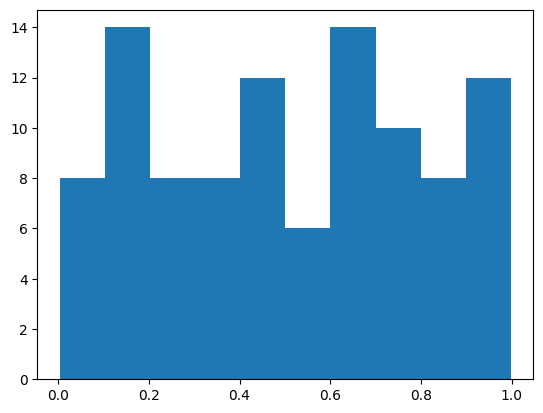

In [30]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X)
mpl.show()

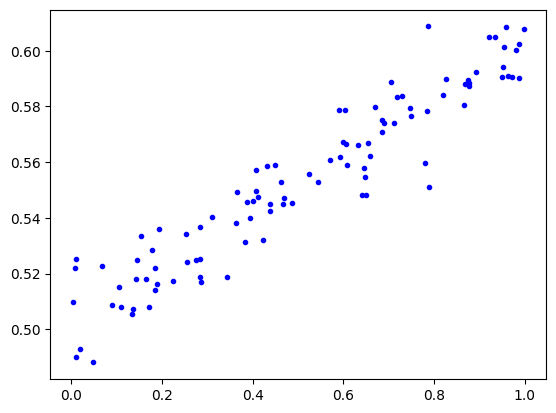

In [33]:
w = 
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:)